In [4]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

# Dice

In [7]:
die = Table().with_column('face', np.arange(6)+1)
die

face
1
2
3
4
5
6


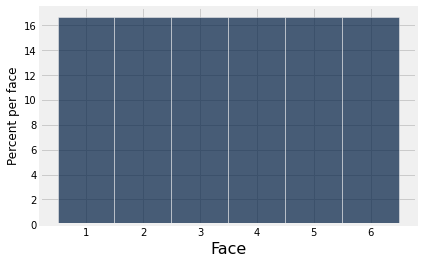

In [8]:
def face_hist(t):
    t.hist('face', bins=np.arange(0.5, 7, 1), unit='face')
    plots.xlabel('Face')
    
face_hist(die)

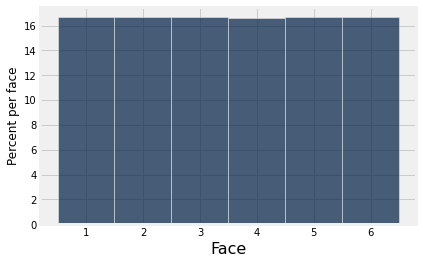

In [14]:
face_hist(die.sample(10000000))

# Large Random Sample

In [17]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


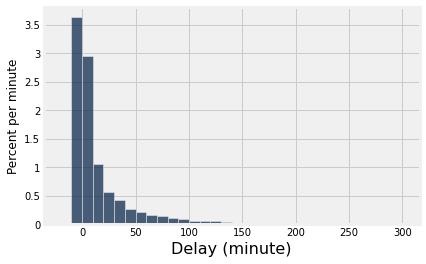

In [18]:
def delay_hist(t):
    t.hist('Delay', unit='minute', bins=np.arange(-20, 301, 10))
    
delay_hist(united)

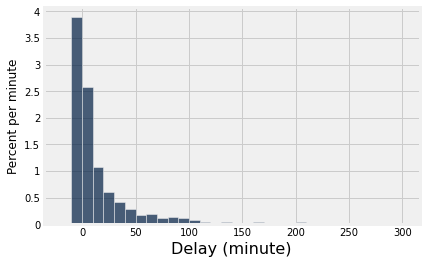

In [20]:
delay_hist(united.sample(1000))

# Simulation

In [22]:
k = 4
1 - (5/6) ** 4

0.5177469135802468

In [24]:
dice = np.arange(6) + 1
rolls = np.random.choice(dice, k)
rolls

array([5, 1, 6, 4])

In [25]:
sum(rolls == 6)

1

In [28]:
def estimate_by_simulation(trials):
    successes = 0

    for _ in np.arange(trials):
        rolls = np.random.choice(dice, k)
        if sum(rolls == 6) > 0:
            successes = successes + 1

    return successes / trials

estimates = []
for _ in np.arange(1000):
    estimates.append(estimate_by_simulation(10000))

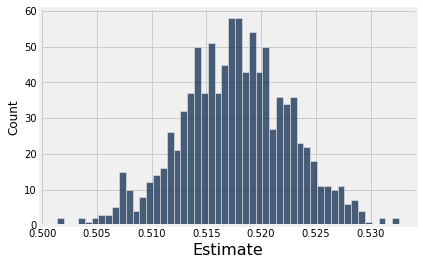

In [29]:
Table().with_column('Estimate', estimates).hist(bins=50, normed=False)